In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json, os, joblib, math, ast
from itertools import product

# COMPARAÇÃO DE MODELOS

In [2]:
df = []

for path in os.listdir('Backup'):
    index = int(path.split('_')[-1])
    
    with open(f'Backup/{path}/info.json', 'r', encoding='utf-8') as file:
        data = json.loads(file.read())
    
    name = data['model']
    data = data['info']
    data['name'] = name
    data['id'] = index
    df.append(data)


df = pd.DataFrame(df)
df

,r2,r2_adj,rmse,mae,name,id
0,0.867535,0.867422,1.473950,1.008981,linear_regression,6
1,0.821346,0.821041,1.976143,1.442391,linear_regression,2
2,0.821346,0.821041,1.976143,1.442391,linear_regression,5
3,0.821346,0.821041,1.976143,1.442391,linear_regression,1
4,0.821346,0.821041,1.976143,1.442391,linear_regression,3
5,0.790338,0.790041,3.107210,1.594914,linear_regression,4


In [3]:
df = df.sort_values(by='r2_adj', ascending=False)
df

,r2,r2_adj,rmse,mae,name,id
0,0.867535,0.867422,1.473950,1.008981,linear_regression,6
1,0.821346,0.821041,1.976143,1.442391,linear_regression,2
2,0.821346,0.821041,1.976143,1.442391,linear_regression,5
3,0.821346,0.821041,1.976143,1.442391,linear_regression,1
4,0.821346,0.821041,1.976143,1.442391,linear_regression,3
5,0.790338,0.790041,3.107210,1.594914,linear_regression,4


Text(0, 0.5, 'R2 Adjusted')

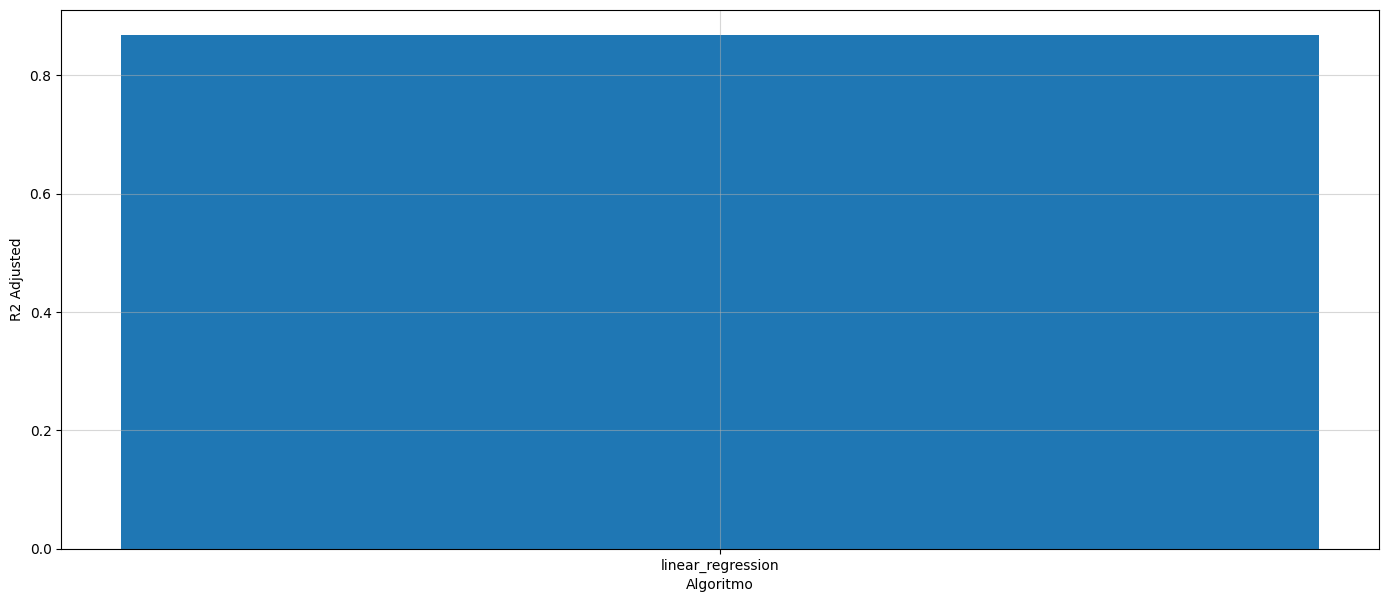

In [4]:
plt.figure(figsize=(17, 7))
plt.bar(df.name, df.r2_adj)
plt.grid(alpha=0.5)
plt.xlabel('Algoritmo'); plt.ylabel('R2 Adjusted')

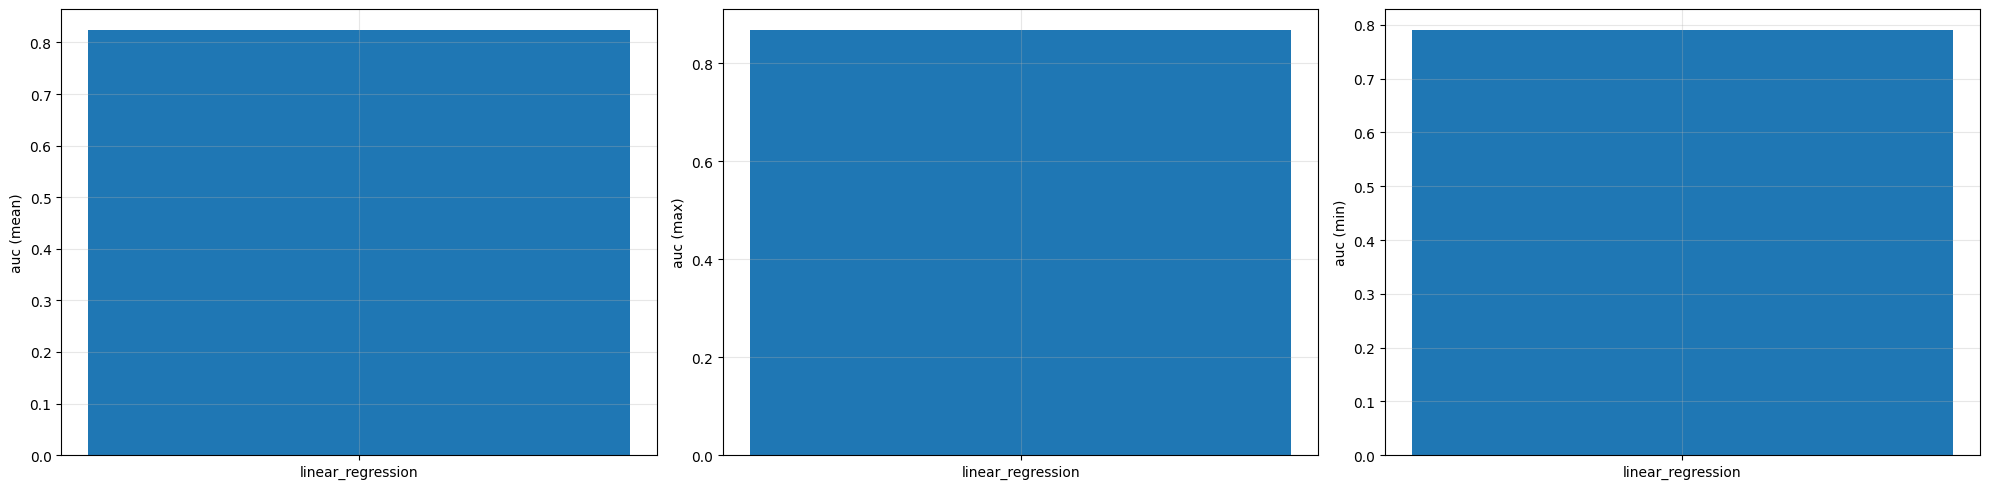

In [5]:
def plotSummary(metric):
    data = {}

    for name in df.name.unique():
        auc = df.loc[df.name == name].r2_adj.agg(metric)
        data[name] = auc
    
    plt.bar(data.keys(), data.values())
    plt.ylabel(f'auc ({metric})')
    plt.grid(alpha=0.3)
    plt.tight_layout()


plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plotSummary('mean')

plt.subplot(1, 3, 2)
plotSummary('max')

plt.subplot(1, 3, 3)
plotSummary('min')

# SELECIONANDO MODELO

In [6]:
target = df.loc[df.name == 'linear_regression'].sort_values(by='r2_adj',ascending=False)
target

,r2,r2_adj,rmse,mae,name,id
0,0.867535,0.867422,1.473950,1.008981,linear_regression,6
1,0.821346,0.821041,1.976143,1.442391,linear_regression,2
2,0.821346,0.821041,1.976143,1.442391,linear_regression,5
3,0.821346,0.821041,1.976143,1.442391,linear_regression,1
4,0.821346,0.821041,1.976143,1.442391,linear_regression,3
5,0.790338,0.790041,3.107210,1.594914,linear_regression,4


In [7]:
def loadModel(id):
    with open(f'Backup/model_{id}/info.json', 'r', encoding='utf-8') as file:
        data = json.loads(file.read())

    data['model'] = joblib.load(f'Backup/model_{id}/model.pkl')
    return data


id   = target.iloc[0].id
data = loadModel(id)
data

{'model': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', LinearRegression(fit_intercept=False))]),
 'params': {'memory': 'None',
  'steps': "[('scaler', StandardScaler()), ('model', LinearRegression(fit_intercept=False))]",
  'transform_input': 'None',
  'verbose': 'False',
  'scaler': 'StandardScaler()',
  'model': 'LinearRegression(fit_intercept=False)',
  'scaler__copy': 'True',
  'scaler__with_mean': 'True',
  'scaler__with_std': 'True',
  'model__copy_X': 'True',
  'model__fit_intercept': 'False',
  'model__n_jobs': 'None',
  'model__positive': 'False',
  'model__tol': '1e-06'},
 'K_CV': 2,
 'info': {'r2': 0.8675346872,
  'r2_adj': 0.8674219987,
  'rmse': 1.4739501118,
  'mae': 1.0089813832},
 'variables': ['wx',
  'wx(n-1)',
  'wx(n-2)',
  'wx(n-3)',
  'wx(n-4)',
  'wx(n-5)',
  'wx(n-6)',
  'wx(n-7)',
  'wx(n-8)',
  'wx(n-9)']}

In [8]:
variables = data['variables']
model = data['model']
model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None


# CARREGANDO DADOS

In [9]:
df = pd.read_csv('../Dataset/model.csv')
df.head(3)

,wx,wx(n-1),wx(n-2),wx(n-3),wx(n-4),wx(n-5),wx(n-6),wx(n-7),wx(n-8),wx(n-9),e
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
